In [ ]:
%matplotlib inline
!pip install qiskit qiskit-ibmq-provider
!pip install numpy matplotlib==3.3.1 pylatexenc==2.7

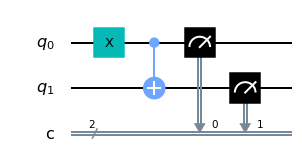

In [3]:
import qiskit as q

# 2 quibits and 2 classical bits
circuit = q.QuantumCircuit(2,2) 

# apply a not gate to qubit 0 - by defualt bits start at 0s
# to start with: qubit 0, 0
circuit.x(0)  # after applying the not gate: qubit 1, 0

# a cnot or a controlled not gate - entagles the qubits
# this gate flips the second qubit value iff the first qubit is a 1
circuit.cx(0, 1) # after applying the cnot gate: qubit 1, 1

# as soon as you take a measurement, qubits in superposition will collapse to a value
# the parameter in it specifies how a qubit register maps to a classical bit
circuit.measure([0, 1], [0, 1])

# circuit draw gives an ascii representation of the circuit
circuit.draw()

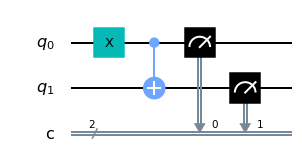

In [4]:
import matplotlib as mpl

# alternative circuit draw with matplotlib
circuit.draw(output='mpl', scale=1)

In [5]:
from qiskit import IBMQ
provider = IBMQ.load_account()

/opt/conda/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


In [6]:
provider = IBMQ.get_provider(hub="ibm-q")

In [7]:
for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count = "simulated"
    print(f"{backend.name()} has {backend.status().pending_jobs} queued and {qubit_count} qubits")

ibmq_qasm_simulator has 0 queued and simulated qubits
ibmqx2 has 0 queued and 5 qubits
ibmq_16_melbourne has 0 queued and 15 qubits
ibmq_vigo has 1 queued and 5 qubits
ibmq_ourense has 65 queued and 5 qubits
ibmq_valencia has 2 queued and 5 qubits
ibmq_london has 2 queued and 5 qubits
ibmq_burlington has 1 queued and 5 qubits
ibmq_essex has 78 queued and 5 qubits
ibmq_armonk has 0 queued and 1 qubits
ibmq_santiago has 32 queued and 5 qubits


In [8]:
# this import tells us where we are in the queue and where we are when we actually run the job
from qiskit.tools.monitor import job_monitor
backend = provider.get_backend("ibmq_burlington")

# The number of times the circuit is run can be specified via the shots argument of the execute method.
job = q.execute(circuit, backend=backend, shots=500)
job_monitor(job)

Job Status: job has successfully run


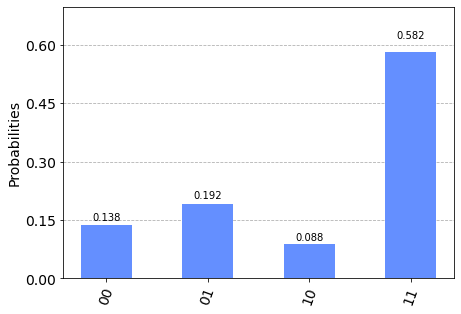

In [9]:
from qiskit.visualization import plot_histogram
# from matplotlib import style # for dark theme
# style.use('dark_background')

result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])

In [10]:
# We were supposed to get 11 as the result although, the other results such as 00, 01, 10 
# is due to quantum noise.

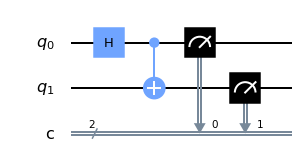

In [11]:
# Running jobs on the simulator is a lot faster
backend = provider.get_backend("ibmq_qasm_simulator")

# 2 quibits and 2 classical bits
circuit = q.QuantumCircuit(2,2) 

# the Hadamard gate puts whatever qubit you in as argument, into superposition
circuit.h(0)

# a cnot or a controlled not gate - entagles the qubits
# this gate flips the second qubit value iff the first qubit is a 1
circuit.cx(0, 1) 

# as soon as you take a measurement, qubits in superposition will collapse to a value
# the parameter in it specifies how a qubit register maps to a classical bit
circuit.measure([0, 1], [0, 1])

# circuit draw gives an ascii representation of the circuit
circuit.draw()

Job Status: job has successfully run


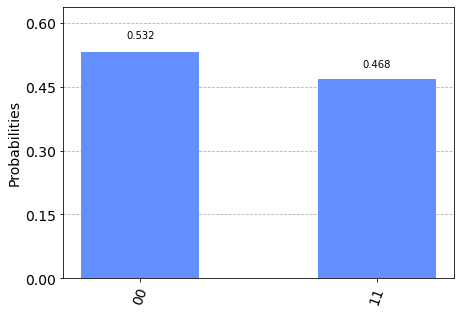

In [12]:
# Run the job
job = q.execute(circuit, backend=backend, shots=500)
job_monitor(job)

# Visualise the results
result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])

In [13]:
# This time we get two major results 00 and 11, becuase we are using a cnot gate and the only time 
# it will flip the second qubit is if the first qubit is 1, and the first qubit is either 1 or 0.
# The other options are not visible becuase a simulator simulates a perfect quantum machine without noise.

In [14]:
# running a quantum simulator locally aka without internet
from qiskit import Aer    # simulator framework for qiskit

for backend in Aer.backends():
    print(backend)
    
# Choose one of these backends
local_backend = Aer.get_backend("qasm_simulator")

qasm_simulator
statevector_simulator
unitary_simulator
pulse_simulator


In [15]:
# return from qasm_simulator are in counts of the result (which can be plotted on a histogram)
# qasm_simulator is closest to running jobs on an actual quantum computer.
# statevector_simulator: you can pass only one shot and you get all possible states

Job Status: job has successfully run


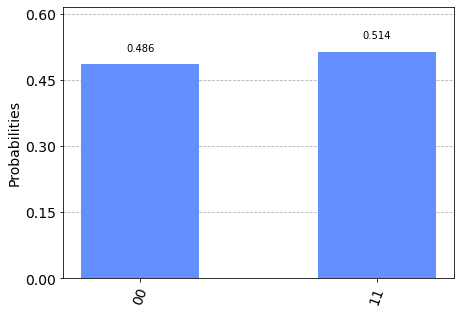

In [16]:
# running on a local simulator 
# notice backend = sim_backend

# Run the job
job = q.execute(circuit, backend=local_backend, shots=500)
job_monitor(job)

# Visualise the results
result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])

In [17]:
# Tutorial 2
from qiskit.tools.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram

statevector_simulator = q.Aer.get_backend("statevector_simulator")
qasm_simulator = q.Aer.get_backend("qasm_simulator")

def test(circuit):
    
    # running jobs on statevector_simulator
    job1 = q.execute(circuit, backend=statevector_simulator).result()
    statevector_result = job1.get_statevector()
    
    n_qubits = circuit.num_qubits
    # mapping quantum bits to classical bits -CHECK
    circuit.measure([i for i in range (n_qubits)],[i for i in range (n_qubits)])
    
    # running jobs on a qasm_simulator
    job2 = q.execute(circuit, backend=qasm_simulator, shots=1024).result()
    counts = job2.get_counts()
    
    return statevector_result, counts

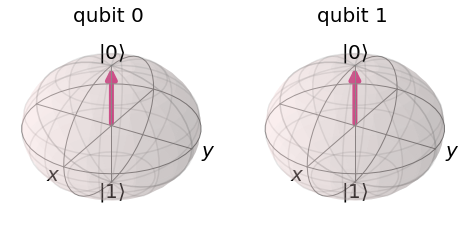

In [18]:
# Example 1
# 2 quibits and 2 classical bits
circuit = q.QuantumCircuit(2,2)
statevector, counts_from_qasm_sim = test(circuit)

plot_bloch_multivector(statevector)

# when you take a measurement, the vectors collapse into either a 0 or 1, depending on the probabilities.

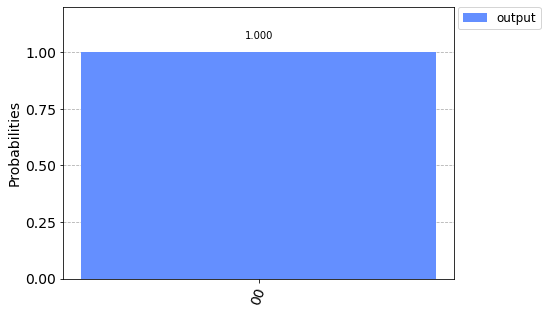

In [19]:
# the distribution is always a 0, 0 in this case (as qubits are 0 to start with)
plot_histogram([counts_from_qasm_sim], legend=["output"])

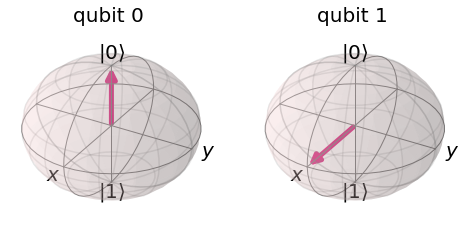

In [20]:
# Example 2
# 2 quibits and 2 classical bits
circuit = q.QuantumCircuit(2,2)

# hadamarad gate applied on qubit index 1 i.e. the second qubit
# hadmard gate puts qubits in superposition
circuit.h(1)  

statevector, counts_from_qasm_sim = test(circuit)

plot_bloch_multivector(statevector)

# the result is that the hadmard gate made the qubit fully point towards x

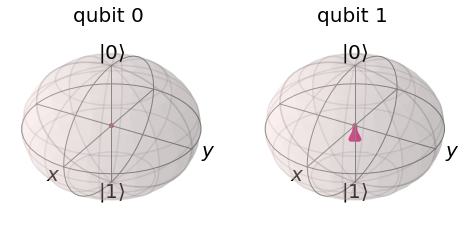

In [21]:
# Example 3
# repeating the same steps as before i.e. using the hadmard gate but with qubit 0 this time

circuit = q.QuantumCircuit(2,2)  # 2 quibits and 2 classical bits

# hadamarad gate applied on qubit index 0
# hadmard gate puts qubits in superposition
circuit.h(0)  

# entagling the two qubits using the cx gate
circuit.cx(0, 1)

statevector, counts_from_qasm_sim = test(circuit)

plot_bloch_multivector(statevector)

# this gives a diff result this time - notice how the qubit 1 is not pointing towards x

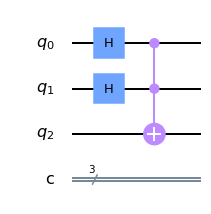

In [23]:
# Example 4
# 3 quibits and 3 classical bits
circuit = q.QuantumCircuit(3,3)

# hadamarad gate applied on qubit index 0 and 1
# hadmard gate puts qubits in superposition
circuit.h(0)
circuit.h(1)

# controlled controlled not gate applied on qubit 2
# cx gate entagles the qubits
# In this case the first two qubits affect the value of qubit 2
circuit.ccx(0,1,2)

circuit.draw()

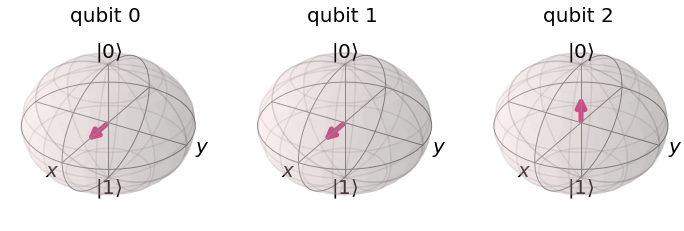

In [24]:
# calling the function test
statevector, counts_from_qasm_sim = test(circuit)
plot_bloch_multivector(statevector)

# The length of the arrow represents the magnitude (possibly - check***)
# when a hadmard gate is applied the qubit is in superposition and they have a 50-50% chance of ending
# up as either a 1 or a 0. Since qubit 0 and 1 is independent, the qubit 2 has a 0.5*0.5 chance of having
# the value 1 and therefore the arrow pointing towards 0 for qubit 2 is smaller in size.

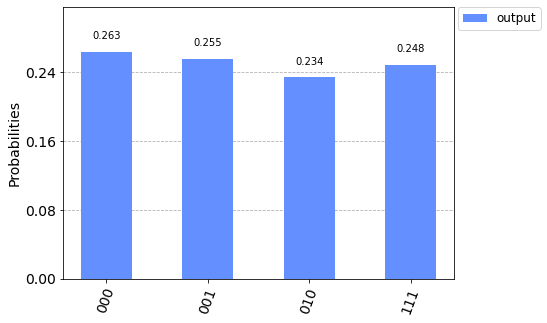

In [25]:
# This means that qubit 0 has a 25% chance of being a 1. This is confirmed by the histogram below. 
# The binary number on the x axis represents the qubits where left most zero (most significant bit)
# represents qubit 2. 
# The value of qubit 2 is 1 only 25 percent of the time (1/4 times)
plot_histogram([counts_from_qasm_sim], legend=["output"])

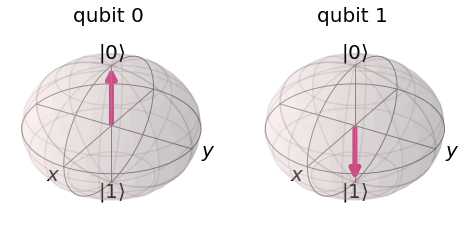

In [29]:
# Example 5
circuit = q.QuantumCircuit(2, 2)

# applying the not gate on qubit index 1
circuit.x(1)
statevector, counts_from_qasm_sim = test(circuit)
plot_bloch_multivector(statevector)

# Notice the original value of qubit index 0 is 0 as we didnt apply the not gate to it

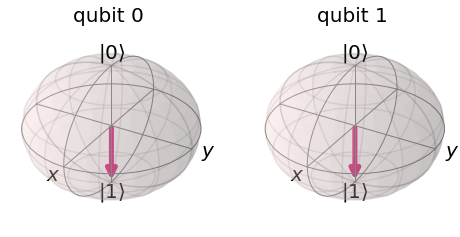

In [31]:
# applying a 180 degree rotation to qubit 1
import math
circuit.rx(math.pi, 0)
statevector, counts_from_qasm_sim = test(circuit)
plot_bloch_multivector(statevector)

# Note: applying the x gate is equivalent to a 180 degree rotation along the x axis
# Although the cx gate is NOT analogous to the xor gate because the output might be the same but the 
# way bits works is not the same.

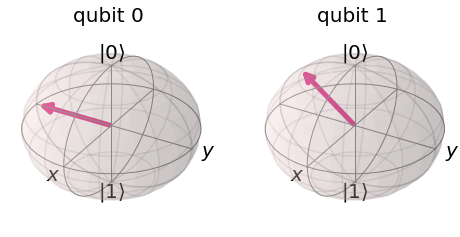

In [36]:
# more rotation examples
# rx is a gate for rotations
circuit.rx(math.pi, 0)   # after this 180 degree rotation, it points back to 0
circuit.rx(math.pi, 1)   # after this pi rotation, it points back to 0
circuit.rx(math.pi/2, 0) # 90 degree rotation
circuit.rx(math.pi/4, 1)   # 45 degree rotation
statevector, counts_from_qasm_sim = test(circuit)
plot_bloch_multivector(statevector)

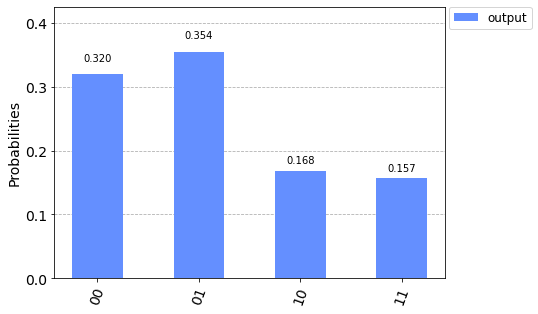

In [37]:
plot_histogram([counts_from_qasm_sim], legend=["output"])
# with 2 qubits - there 2^2 = 4 outputs. 
# Note: these outputs are not noise (since we are running it on a simulator), these are all possible outputs

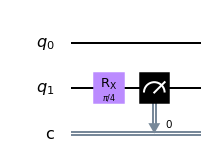

In [41]:
# Example 6
# Plotting only the possible outcomes of the 2nd qubit (which is currently pointing at 45 degrees)
# From the histogram above you can see that most of the time it is a 0 and it is less likely to be a 1

# for 2 qubits, 1 bit
circuit = q.QuantumCircuit(2, 1)

# 45 degree rotation to qubit 2 (with zero indexing: 1)
circuit.rx(math.pi/4, 1)

circuit.measure([1], [0])
circuit.draw()

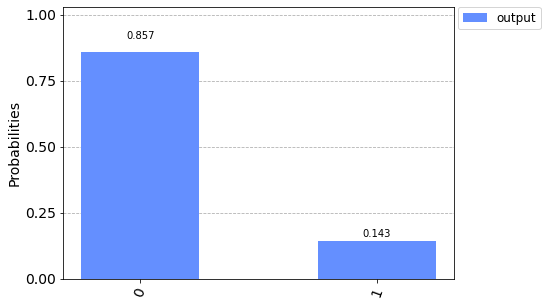

In [43]:
job = q.execute(circuit, backend=qasm_simulator, shots=1024).result()
counts = job.get_counts()
plot_histogram([counts], legend=["output"])